# Perth Housing Analysis

In [36]:
# Import dependencies 

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np



In [37]:
# Import CSV 
perth_housing = pd.read_csv('Perth_housing_data.csv')
perth_housing.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


## Clean the data ## 


In [38]:
# Delete irrelevant columsn = garage, address, floor area.
new_perth_housing = perth_housing.drop(['ADDRESS', 'GARAGE', 'FLOOR_AREA', 'NEAREST_SCH_RANK'] , axis =1)

# Remove all null values including
new_perth_housing.dropna(how ='any', inplace = True)

# Convert School distance to meters and convert to integer
new_perth_housing['NEAREST_SCH_DIST'] = (new_perth_housing[['NEAREST_SCH_DIST']] * 1000).astype(int)

#Convert Build Year to Integer 
new_perth_housing['BUILD_YEAR'] = new_perth_housing['BUILD_YEAR'].astype(int)

# Remove post codes which are out of Perth
new_perth_housing = new_perth_housing[new_perth_housing['POSTCODE'] < 6200]

In [39]:
#Check the properties of the dataframe. 
new_perth_housing.shape

(30378, 15)

In [40]:
# Change datatype of DATE SOLD column to string to remove '/r' 
new_perth_housing[['DATE_SOLD']] = new_perth_housing[['DATE_SOLD']].astype('string')
new_perth_housing['DATE_SOLD'] = new_perth_housing['DATE_SOLD'].str[:7]

#Split Month and Year 
new_perth_housing['DATE_SOLD'] = pd.to_datetime(new_perth_housing['DATE_SOLD'])

# Add clean data to new frame
clean_perth_housing = new_perth_housing

/var/folders/yh/d9vyd51x27137p_k6yk1h2300000gn/T/ipykernel_1326/868040009.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_perth_housing['DATE_SOLD'] = pd.to_datetime(new_perth_housing['DATE_SOLD'])


In [41]:
clean_perth_housing.head(5)

,SUBURB,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST
0,South Lake,565000,4,2,600,2003,18300,Cockburn Central Station,1800,2018-09-01,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,828
1,Wandi,365000,3,2,351,2013,26900,Kwinana Station,4900,2019-02-01,6167,-32.193470,115.859554,ATWELL COLLEGE,5524
2,Camillo,287000,3,1,719,1979,22600,Challis Station,1900,2015-06-01,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1649
3,Bellevue,255000,2,1,651,1953,17900,Midland Station,3600,2018-07-01,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1571
4,Lockridge,325000,4,1,466,1998,11200,Bassendean Station,2000,2016-11-01,6054,-31.885790,115.947780,KIARA COLLEGE,1514


In [42]:
# Count the number of house sales in a particular year. Results in descending order.

clean_perth_housing['Sale_Year'] = pd.to_datetime(clean_perth_housing['DATE_SOLD']).dt.year
yearly_sales = clean_perth_housing['Sale_Year'].value_counts()

In [43]:
print(yearly_sales)

Sale_Year
2018    5101
2020    4799
2019    4761
2017    4460
2016    3584
2015    2804
2014    1661
2013     996
2012     469
2011     300
2010     231
2009     223
2007     136
2008     132
2006     124
2005     106
2003      77
2002      69
2004      67
2001      47
1998      40
2000      35
1999      29
1997      22
1995      19
1994      18
1996      16
1992      11
1991      11
1993      10
1989       8
1988       8
1990       4
Name: count, dtype: int64


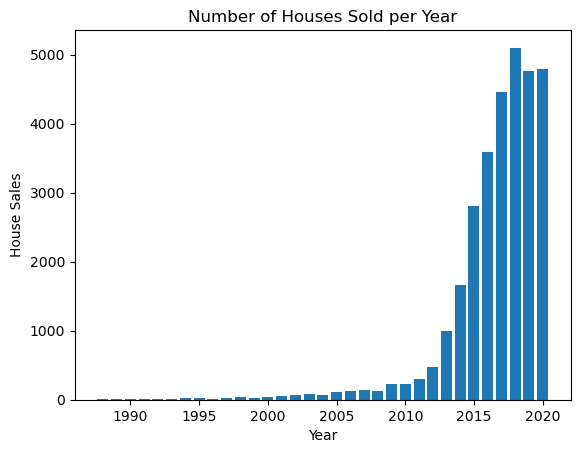

In [47]:
# Create a bar graph
plt.bar(yearly_sales.index, yearly_sales.values)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('House Sales')
plt.title('Number of Houses Sold per Year')

# Show the graph
plt.savefig('plot1.png')

plt.show()



Sales_By_Month
10    2934
11    2889
8     2679
7     2623
9     2595
3     2565
5     2541
6     2501
12    2477
4     2330
2     2202
1     2042
Name: count, dtype: int64


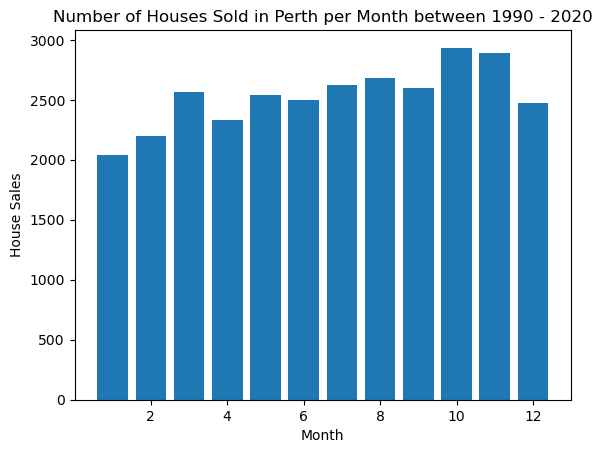

In [48]:
# Which month and has the best sales?

clean_perth_housing['Sales_By_Month'] = pd.to_datetime(clean_perth_housing['DATE_SOLD']).dt.month
monthly_sales = clean_perth_housing['Sales_By_Month'].value_counts()

print(monthly_sales)

plt.bar(monthly_sales.index, monthly_sales.values)

plt.xlabel('Month')
plt.ylabel('House Sales')
plt.title('Number of Houses Sold in Perth per Month between 1990 - 2020')

plt.savefig('plot2.png')

plt.show()

CBD_DIST
12600    168
12500    164
14900    160
12700    151
12200    150
        ... 
2137       1
793        1
956        1
57700      1
58100      1
Name: count, Length: 593, dtype: int64


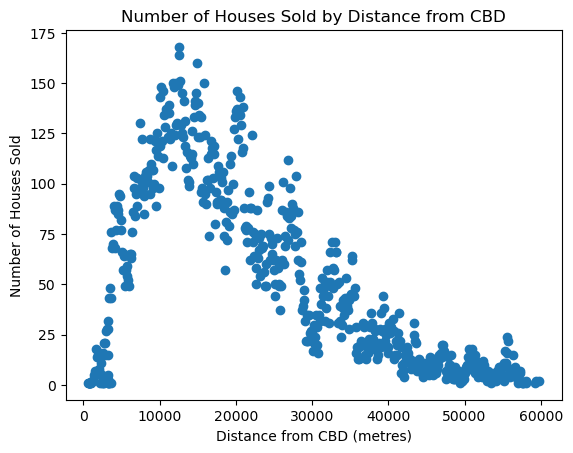

In [52]:
# Number of Houses Sold per Postcode

Sales_by_Dist_from_CBD = clean_perth_housing['CBD_DIST'].value_counts()

print(Sales_by_Dist_from_CBD)

plt.scatter(Sales_by_Dist_from_CBD.index, Sales_by_Dist_from_CBD.values)

plt.xlabel('Distance from CBD (metres)')
plt.ylabel('Number of Houses Sold')
plt.title('Number of Houses Sold by Distance from CBD')

plt.savefig('plot3.png')

plt.show()

CBD_DIST
681      645000
693      640000
710      790000
747      430000
793      980000
          ...  
58000    492000
58100    635000
59200    650000
59400    592500
59800    190000
Name: PRICE, Length: 593, dtype: int64


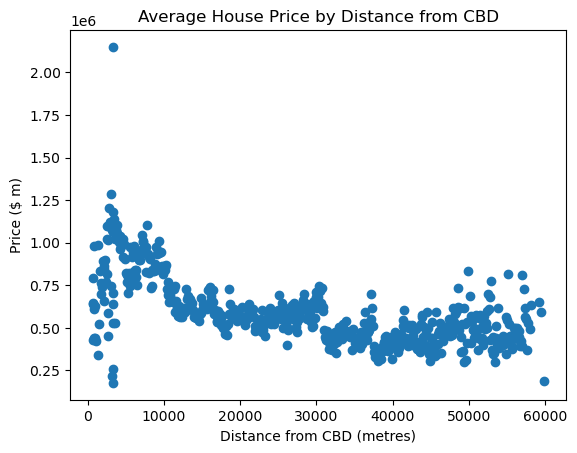

In [56]:
# Average House price per Suburb

Average_House_Price = clean_perth_housing.groupby('CBD_DIST')['PRICE'].mean().astype(int)

print(Average_House_Price)

plt.scatter(Average_House_Price.index, Average_House_Price.values)

plt.xlabel('Distance from CBD (metres)')
plt.ylabel('Price ($ m)')
plt.title('Average House Price by Distance from CBD')

plt.savefig('plot4.png')

plt.show()